# Scraper e base de dados

A primeira coisa a ser feita é importar o comando app para ter acesso ao app a ser analisado. Na sequência deve-se importar os comandos para baixar as reviews de forma ordenada. Assim sendo, as reviews são retornas em forma de lista, onde cada review é um dicionário.

In [13]:
#Importando o comando app da library google-play-scraper
from google_play_scraper import app

In [14]:
# Selecionando o app a ter as avaliações analisadas
result = app('com.mercadoenvios.crowdsourcing', lang = 'pt', country = 'br')
result

{'title': 'Mercado Envios Extra',
 'description': 'Dirija pela cidade (¹) entregando pacotes de compradores do Mercado Livre. Você pode fazer isso nos dias que preferir e receber o pagamento pelo serviço na sua conta Mercado Pago.\r\n\r\n<b>Com o Mercado Envios Extra, você é seu próprio patrão</b>\r\n\r\n- Você escolhe em quais dias vai prestar serviços\r\n- Pode ganhar até R$ 240 por dia (²)\r\n- Não precisa ter conta bancária\r\n- Recebe pedidos agrupados por percurso e aceita os que preferir\r\n- Pode conferir os ganhos e a duração estimada de cada percurso antes de aceitá-lo\r\n\r\n<b>Quais os requisitos para dirigir com o app?</b>\r\n\r\n- Ter um veículo de até 15 anos\r\n- Caso utilize moto, ter uma mochila ou baú de 80 litros ou mais \r\n- Carteira Nacional de Habilitação (CNH) vigente\r\n- Cadastro Nacional de Pessoa Jurídica (CNPJ)\r\n- Ter cadastro de Microempreendedor Individual (MEI), com atividade principal ou secundária específica de entregas (CNAE 4930-2/01, 4930-2/02, 5

In [15]:
from google_play_scraper import Sort, reviews_all
#Comando para baixar todas as reviews, são ordenadas por relevância
reviews = reviews_all( 'com.mercadoenvios.crowdsourcing', lang = 'pt', country = 'br', sort = Sort.MOST_RELEVANT, sleep_milliseconds = 0)
# Retorna uma lista de dicionários, onde cada um corresponde a uma review
reviews

[{'reviewId': 'gp:AOqpTOGYydQGCs9gN__9FlzLmI4HTmYMbP4KiUaF_uKRiyG8C7LJLZ_qkyzsx18xinwvRhoPreJbUmJY-OIVH8E',
  'userName': 'Antonio Andrade',
  'userImage': 'https://play-lh.googleusercontent.com/a/AATXAJxLr4JGyUeIkEG_uaK3A_mMINiaB8cFaNuIOUF4=mo',
  'content': 'Aqui em Curitiba até que funciona bem, o problema é que é difícil conseguir rotas todos os dias, não sei se é o app ou problema do meu celular, mais quanto toca a notificação e vou ver não esta mais disponível, deveria ter um botão de auto aceitação assim que trabalha certinho tem as rotas garantida pelo app, fica a dica!!',
  'score': 3,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.14.3',
  'at': datetime.datetime(2022, 2, 16, 8, 22, 36),
  'replyContent': None,
  'repliedAt': None},
 {'reviewId': 'gp:AOqpTOHcP6sQhFPVQ5azKpzHOcMLVMKGAT2bXK_XMWj5fiSd6QNOo0CnI09amJTtEIxj1N3SfEMdYnpRYVfR5ew',
  'userName': 'Beto Store',
  'userImage': 'https://play-lh.googleusercontent.com/a-/AOh14Gj4GBa2KccpNlh9AEBTwdjf7MXUJyUoV5OIegZ8Hg',
 

# Trabalhando os Dados

Para iniciar o tratamento dos dados começa-se com a transformação da lista de reviews em um dataset onde cada linha é uma review e cada coluna é uma informação a mesma, isso é feito através da biblioteca pandas. Depois, é necessário importar a biblioteca nltk e alguns corpus para análise do texto. Com o nltk transforma-se o texto de opinião de cada review em uma lista de tokens.

In [16]:
#Importando pandas.
import pandas as pd

#Transformando os dados em um DataFrame para trabalharmos as análises.
reviews_app = pd.DataFrame(reviews)

#Verificando a série de dados.
reviews_app

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGYydQGCs9gN__9FlzLmI4HTmYMbP4KiUaF_uK...,Antonio Andrade,https://play-lh.googleusercontent.com/a/AATXAJ...,"Aqui em Curitiba até que funciona bem, o probl...",3,0,2.14.3,2022-02-16 08:22:36,None,NaT
1,gp:AOqpTOHcP6sQhFPVQ5azKpzHOcMLVMKGAT2bXK_XMWj...,Beto Store,https://play-lh.googleusercontent.com/a-/AOh14...,Horrível! Tenho vídeo comprovando que o app é ...,1,0,2.14.3,2022-02-10 07:41:56,Olá! Agradecemos o seu comentário. As sugestõe...,2022-01-20 14:39:14
2,gp:AOqpTOFUE1PRccxPNdHJPFXTXiTqtVhjosMd1dmYHs4...,Alan Kelston,https://play-lh.googleusercontent.com/a-/AOh14...,Estou tendo problemas com o app! As rotas apar...,1,0,2.14.3,2022-02-11 07:16:59,None,NaT
3,gp:AOqpTOERRr6_TIvSwRX-aQZjANiz3OaXPG0wWYDVqu7...,Jhow Pereira,https://play-lh.googleusercontent.com/a-/AOh14...,Não aparece mais rota! Estou desde dezembro se...,1,0,2.14.3,2022-02-14 22:54:52,None,NaT
4,gp:AOqpTOF3F1zlFnA3cUdwpa0q5HOqtKhA-SoOEJH0nkJ...,Edgar & lediana Dange,https://play-lh.googleusercontent.com/a-/AOh14...,Marca um horário para carregar e acaba carrega...,1,0,2.14.3,2022-02-10 23:33:18,None,NaT
...,...,...,...,...,...,...,...,...,...,...
1184,gp:AOqpTOHwY4VHdWUZzdzdpU1SGwAgYermEQpQhIIYZB8...,Anailton Pereira Lima,https://play-lh.googleusercontent.com/a-/AOh14...,Bom,5,0,2.10.1,2021-10-30 13:27:53,Olá! Agradecemos o seu comentário.,2021-11-10 11:09:11
1185,gp:AOqpTOFo6xdAIdHbzrnLI96Cv5Izu_6l8NzLzUAO6dK...,Drios Rocha,https://play-lh.googleusercontent.com/a/AATXAJ...,Ótimo,5,0,2.10.1,2021-10-29 15:30:38,\nOlá! Agradecemos o seu comentário.\n,2021-10-25 14:51:12
1186,gp:AOqpTOFwbvCbHek1qZEG3mDDwD_f0_tqwAj2dhqveJU...,Marco Pereira,https://play-lh.googleusercontent.com/a/AATXAJ...,Muito bom 😊,5,2,2.9.0,2021-10-12 10:52:17,Olá! Agradecemos o seu comentário.,2021-10-25 16:43:02
1187,gp:AOqpTOENPJP5KqEK9A4EPt_MHzfRaY6T7i2lhRdNfWS...,Roberto Cardim,https://play-lh.googleusercontent.com/a/AATXAJ...,muito bom,5,5,2.8.0,2021-09-29 16:47:24,\nOlá! Agradecemos o seu comentário.\n,2021-10-25 17:04:09


In [17]:
# Importando o nltk e salvando os corpus necessários
import nltk
# Pacotes de corpus necessários
# nltk.download('wordnet')
# nltk.download('punkt')

# Copiando a review para manter a mensagem original
reviews_app['review'] = reviews_app['content']
# Transforma as reviews em uma list onde cada item é uma palavra(tokeniza as reviews)
reviews_app['content'] = reviews_app.apply(lambda row: nltk.word_tokenize(row['content']), axis=1) # Tokenização dos dados
reviews_app

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review
0,gp:AOqpTOGYydQGCs9gN__9FlzLmI4HTmYMbP4KiUaF_uK...,Antonio Andrade,https://play-lh.googleusercontent.com/a/AATXAJ...,"[Aqui, em, Curitiba, até, que, funciona, bem, ...",3,0,2.14.3,2022-02-16 08:22:36,None,NaT,"Aqui em Curitiba até que funciona bem, o probl..."
1,gp:AOqpTOHcP6sQhFPVQ5azKpzHOcMLVMKGAT2bXK_XMWj...,Beto Store,https://play-lh.googleusercontent.com/a-/AOh14...,"[Horrível, !, Tenho, vídeo, comprovando, que, ...",1,0,2.14.3,2022-02-10 07:41:56,Olá! Agradecemos o seu comentário. As sugestõe...,2022-01-20 14:39:14,Horrível! Tenho vídeo comprovando que o app é ...
2,gp:AOqpTOFUE1PRccxPNdHJPFXTXiTqtVhjosMd1dmYHs4...,Alan Kelston,https://play-lh.googleusercontent.com/a-/AOh14...,"[Estou, tendo, problemas, com, o, app, !, As, ...",1,0,2.14.3,2022-02-11 07:16:59,None,NaT,Estou tendo problemas com o app! As rotas apar...
3,gp:AOqpTOERRr6_TIvSwRX-aQZjANiz3OaXPG0wWYDVqu7...,Jhow Pereira,https://play-lh.googleusercontent.com/a-/AOh14...,"[Não, aparece, mais, rota, !, Estou, desde, de...",1,0,2.14.3,2022-02-14 22:54:52,None,NaT,Não aparece mais rota! Estou desde dezembro se...
4,gp:AOqpTOF3F1zlFnA3cUdwpa0q5HOqtKhA-SoOEJH0nkJ...,Edgar & lediana Dange,https://play-lh.googleusercontent.com/a-/AOh14...,"[Marca, um, horário, para, carregar, e, acaba,...",1,0,2.14.3,2022-02-10 23:33:18,None,NaT,Marca um horário para carregar e acaba carrega...
...,...,...,...,...,...,...,...,...,...,...,...
1184,gp:AOqpTOHwY4VHdWUZzdzdpU1SGwAgYermEQpQhIIYZB8...,Anailton Pereira Lima,https://play-lh.googleusercontent.com/a-/AOh14...,[Bom],5,0,2.10.1,2021-10-30 13:27:53,Olá! Agradecemos o seu comentário.,2021-11-10 11:09:11,Bom
1185,gp:AOqpTOFo6xdAIdHbzrnLI96Cv5Izu_6l8NzLzUAO6dK...,Drios Rocha,https://play-lh.googleusercontent.com/a/AATXAJ...,[Ótimo],5,0,2.10.1,2021-10-29 15:30:38,\nOlá! Agradecemos o seu comentário.\n,2021-10-25 14:51:12,Ótimo
1186,gp:AOqpTOFwbvCbHek1qZEG3mDDwD_f0_tqwAj2dhqveJU...,Marco Pereira,https://play-lh.googleusercontent.com/a/AATXAJ...,"[Muito, bom, 😊]",5,2,2.9.0,2021-10-12 10:52:17,Olá! Agradecemos o seu comentário.,2021-10-25 16:43:02,Muito bom 😊
1187,gp:AOqpTOENPJP5KqEK9A4EPt_MHzfRaY6T7i2lhRdNfWS...,Roberto Cardim,https://play-lh.googleusercontent.com/a/AATXAJ...,"[muito, bom]",5,5,2.8.0,2021-09-29 16:47:24,\nOlá! Agradecemos o seu comentário.\n,2021-10-25 17:04:09,muito bom


# Tratamento do texto

Para análise é tratar as reviews normalizando-as, dessa forma, faz-se necessário remover as chamadas stopwords, pontuações e padronizar o case das listas de palavras que são cada review.

In [18]:
import string
from nltk.corpus import stopwords
# nltk.download('stopwords')
language = 'portuguese'

# Criando a lista de stopwords
stopwords = stopwords.words(language)
stopwords = list(set(stopwords))
print(stopwords)

# Criando lista com as pontuações
punctuations = string.punctuation
punctuations

['tiver', 'nós', 'pelas', 'seriam', 'na', 'a', 'hei', 'estão', 'está', 'terei', 'terão', 'mesmo', 'suas', 'fosse', 'tu', 'estivessem', 'mas', 'houverei', 'éramos', 'forem', 'fossem', 'teria', 'seja', 'terá', 'estive', 'como', 'houvéramos', 'estiveram', 'eram', 'fôramos', 'minha', 'lhes', 'for', 'houvessem', 'houverem', 'num', 'já', 'tivesse', 'houvesse', 'havemos', 'estivermos', 'não', 'será', 'houveria', 'tenhamos', 'e', 'em', 'teremos', 'houveremos', 'as', 'se', 'estivesse', 'esteja', 'sejamos', 'aos', 'estivéssemos', 'sou', 'ela', 'isto', 'serei', 'aquelas', 'tivéramos', 'era', 'é', 'seríamos', 'houver', 'isso', 'dos', 'ou', 'meu', 'estejamos', 'estiver', 'delas', 'só', 'eu', 'aquela', 'houverá', 'tivéssemos', 'são', 'aquilo', 'tinha', 'estivemos', 'tínhamos', 'do', 'te', 'teu', 'dela', 'nas', 'serão', 'somos', 'até', 'qual', 'minhas', 'esta', 'sua', 'estes', 'ao', 'para', 'você', 'houverão', 'tem', 'com', 'essas', 'nossos', 'elas', 'pelo', 'fôssemos', 'vos', 'hajam', 'um', 'mais', 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
# Remoção de stopwords
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [20]:
# Padroniza as palavras recebidas para lowercase
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [21]:
# Remove as pontuações e stopwords do conjunto de palavras recebido
def remove_punctuation_stopwords(words):
    new_words = []
    for word in words:
        if word not in punctuations and word not in stopwords:
            new_words.append(word)

    return new_words

In [22]:
# Aplica os métodos acima em cada palavra de uma dada list
def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation_stopwords(words)

    return words

In [23]:
# Normalização das palavras das reviews
reviews_app['content'] = reviews_app.apply(lambda row: normalize(row['content']), axis=1)
#reviews_app['content']
# reviews_app
reviews_app['content']

0       [aqui, curitiba, funciona, bem, problema, difí...
1       [horrível, vídeo, comprovando, app, bugado, .....
2       [tendo, problemas, app, rotas, aparecem, notif...
3       [aparece, rota, desde, dezembro, fazer, rotas,...
4       [marca, horário, carregar, acaba, carregando, ...
                              ...                        
1184                                                [bom]
1185                                              [ótimo]
1186                                             [bom, 😊]
1187                                                [bom]
1188                                      [app, incrível]
Name: content, Length: 1189, dtype: object

# Léxico

O léxico precisa ser tratado também, portanto é necessário carregar o arquivo que o contêm e, em um dicionário, armazenar suas palavras e as pontuações associadas a elas. O dicionário possui suas chaves sendo as palavras e os valores as pontuações.

In [24]:
#Importando o Léxico de Palavras com polaridades
sentilexpt = open('./lexiconPT/data-raw/SentiLex-lem-PT02.txt')

#Criando um dicionário de palavras com a respectiva polaridade.
dic_word_polarize = {}
for i in sentilexpt.readlines():
    post_dot = i.find('.')
    word = (i[:post_dot])
    pol_post = i.find('POL')
    polarize = (i[pol_post+7:pol_post+9]).replace(';', '')
    dic_word_polarize[word] = polarize


#Verificando o dicionário
dic_word_polarize

{'à-vontade': '1',
 'abafado': '-1',
 'abafante': '-1',
 'abaixado': '-1',
 'abalado': '-1',
 'abalizado': '1',
 'abalroado': '-1',
 'abalroar': '1',
 'abanar': '1',
 'abandalhado': '-1',
 'abandalhamento': '-1',
 'abandonado': '-1',
 'abandonar': '-1',
 'abarcante': '0',
 'abarrotado': '-1',
 'abastado': '1',
 'abastecido': '0',
 'abater': '1',
 'abatido': '-1',
 'abelhudo': '-1',
 'abençoado': '1',
 'aberração': '-1',
 'aberrante': '-1',
 'aberrativo': '-1',
 'aberto': '1',
 'abespinhado': '-1',
 'abestalhado': '-1',
 'abilolado': '-1',
 'abjeção': '-1',
 'abjecção': '-1',
 'abjecto': '-1',
 'abjeto': '-1',
 'abnegado': '1',
 'abobado': '-1',
 'abobalhado': '-1',
 'abolicionista': '0',
 'abolido': '-1',
 'abominador': '-1',
 'abominando': '-1',
 'abominar': '0',
 'abominável': '-1',
 'abonado': '1',
 'abonatório': '1',
 'abonecado': '0',
 'aborrecer-se': '-1',
 'aborrecer': '1',
 'aborrecido': '-1',
 'abortado': '-1',
 'abraçado': '1',
 'abrasileirado': '0',
 'abrigado': '0',
 'abril

# Pontuando as reviews

Para pontuar cada review é necessária uma função onde se cada palavra é analisada e recebe uma pontuação, conforme estabelecida no léxico.

In [25]:
# Função para determinar os sentimentos associados a cada palavra
def feling_score(sentence):
    # List com os valores de sentimentos de cada palavra que compõe a frase em questão
    sentece_felings = []
    # Seleciona cada palavra da do conjunto recebido, busca ela no léxio e adiciona a pontuação a list de valores
    for word in sentence:
        sentece_felings.append(int(dic_word_polarize.get(word, 0)))
    score = sum(sentece_felings)
    # Análise do score final
    if score > 0:
        return 'Positivo {} '.format(score)
    elif score == 0:
        return 'Neutro {} '.format(score)
    else:
        return 'Negativo {}'.format(score)

In [26]:
# Aplicando a função de pontuação nas reviews
reviews_app['feling'] = reviews_app.apply(lambda row: feling_score(row['content']), axis=1)
reviews_app

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review,feling
0,gp:AOqpTOGYydQGCs9gN__9FlzLmI4HTmYMbP4KiUaF_uK...,Antonio Andrade,https://play-lh.googleusercontent.com/a/AATXAJ...,"[aqui, curitiba, funciona, bem, problema, difí...",3,0,2.14.3,2022-02-16 08:22:36,None,NaT,"Aqui em Curitiba até que funciona bem, o probl...",Negativo -3
1,gp:AOqpTOHcP6sQhFPVQ5azKpzHOcMLVMKGAT2bXK_XMWj...,Beto Store,https://play-lh.googleusercontent.com/a-/AOh14...,"[horrível, vídeo, comprovando, app, bugado, .....",1,0,2.14.3,2022-02-10 07:41:56,Olá! Agradecemos o seu comentário. As sugestõe...,2022-01-20 14:39:14,Horrível! Tenho vídeo comprovando que o app é ...,Negativo -1
2,gp:AOqpTOFUE1PRccxPNdHJPFXTXiTqtVhjosMd1dmYHs4...,Alan Kelston,https://play-lh.googleusercontent.com/a-/AOh14...,"[tendo, problemas, app, rotas, aparecem, notif...",1,0,2.14.3,2022-02-11 07:16:59,None,NaT,Estou tendo problemas com o app! As rotas apar...,Neutro 0
3,gp:AOqpTOERRr6_TIvSwRX-aQZjANiz3OaXPG0wWYDVqu7...,Jhow Pereira,https://play-lh.googleusercontent.com/a-/AOh14...,"[aparece, rota, desde, dezembro, fazer, rotas,...",1,0,2.14.3,2022-02-14 22:54:52,None,NaT,Não aparece mais rota! Estou desde dezembro se...,Negativo -2
4,gp:AOqpTOF3F1zlFnA3cUdwpa0q5HOqtKhA-SoOEJH0nkJ...,Edgar & lediana Dange,https://play-lh.googleusercontent.com/a-/AOh14...,"[marca, horário, carregar, acaba, carregando, ...",1,0,2.14.3,2022-02-10 23:33:18,None,NaT,Marca um horário para carregar e acaba carrega...,Positivo 1
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,gp:AOqpTOHwY4VHdWUZzdzdpU1SGwAgYermEQpQhIIYZB8...,Anailton Pereira Lima,https://play-lh.googleusercontent.com/a-/AOh14...,[bom],5,0,2.10.1,2021-10-30 13:27:53,Olá! Agradecemos o seu comentário.,2021-11-10 11:09:11,Bom,Positivo 1
1185,gp:AOqpTOFo6xdAIdHbzrnLI96Cv5Izu_6l8NzLzUAO6dK...,Drios Rocha,https://play-lh.googleusercontent.com/a/AATXAJ...,[ótimo],5,0,2.10.1,2021-10-29 15:30:38,\nOlá! Agradecemos o seu comentário.\n,2021-10-25 14:51:12,Ótimo,Positivo 1
1186,gp:AOqpTOFwbvCbHek1qZEG3mDDwD_f0_tqwAj2dhqveJU...,Marco Pereira,https://play-lh.googleusercontent.com/a/AATXAJ...,"[bom, 😊]",5,2,2.9.0,2021-10-12 10:52:17,Olá! Agradecemos o seu comentário.,2021-10-25 16:43:02,Muito bom 😊,Positivo 1
1187,gp:AOqpTOENPJP5KqEK9A4EPt_MHzfRaY6T7i2lhRdNfWS...,Roberto Cardim,https://play-lh.googleusercontent.com/a/AATXAJ...,[bom],5,5,2.8.0,2021-09-29 16:47:24,\nOlá! Agradecemos o seu comentário.\n,2021-10-25 17:04:09,muito bom,Positivo 1


# Apresentação dos resultados

Os resultados das análises são adicionados ao próprio dataframe das reviews. Assim sendo, eles são dispostos em uma coluna 'Feling_Score' que contêm a soma das pontuações daquela review e uma coluna 'Feling' que exibe se aquela review possui uma conotação positiva, negativa ou neutra.

In [27]:
# Reorganizando o resultado em colunas
reviews_app['Feling_Score'] = reviews_app['feling'].str.slice(-2) # Retira a pontuacao
reviews_app['Feling_Score'] =reviews_app['Feling_Score'].astype(int)
reviews_app['Feling'] = reviews_app['feling'].str.slice(0,-3) # Retira a classificacao do sentimento
reviews_app

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review,feling,Feling_Score,Feling
0,gp:AOqpTOGYydQGCs9gN__9FlzLmI4HTmYMbP4KiUaF_uK...,Antonio Andrade,https://play-lh.googleusercontent.com/a/AATXAJ...,"[aqui, curitiba, funciona, bem, problema, difí...",3,0,2.14.3,2022-02-16 08:22:36,None,NaT,"Aqui em Curitiba até que funciona bem, o probl...",Negativo -3,-3,Negativo
1,gp:AOqpTOHcP6sQhFPVQ5azKpzHOcMLVMKGAT2bXK_XMWj...,Beto Store,https://play-lh.googleusercontent.com/a-/AOh14...,"[horrível, vídeo, comprovando, app, bugado, .....",1,0,2.14.3,2022-02-10 07:41:56,Olá! Agradecemos o seu comentário. As sugestõe...,2022-01-20 14:39:14,Horrível! Tenho vídeo comprovando que o app é ...,Negativo -1,-1,Negativo
2,gp:AOqpTOFUE1PRccxPNdHJPFXTXiTqtVhjosMd1dmYHs4...,Alan Kelston,https://play-lh.googleusercontent.com/a-/AOh14...,"[tendo, problemas, app, rotas, aparecem, notif...",1,0,2.14.3,2022-02-11 07:16:59,None,NaT,Estou tendo problemas com o app! As rotas apar...,Neutro 0,0,Neutro
3,gp:AOqpTOERRr6_TIvSwRX-aQZjANiz3OaXPG0wWYDVqu7...,Jhow Pereira,https://play-lh.googleusercontent.com/a-/AOh14...,"[aparece, rota, desde, dezembro, fazer, rotas,...",1,0,2.14.3,2022-02-14 22:54:52,None,NaT,Não aparece mais rota! Estou desde dezembro se...,Negativo -2,-2,Negativo
4,gp:AOqpTOF3F1zlFnA3cUdwpa0q5HOqtKhA-SoOEJH0nkJ...,Edgar & lediana Dange,https://play-lh.googleusercontent.com/a-/AOh14...,"[marca, horário, carregar, acaba, carregando, ...",1,0,2.14.3,2022-02-10 23:33:18,None,NaT,Marca um horário para carregar e acaba carrega...,Positivo 1,1,Positivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,gp:AOqpTOHwY4VHdWUZzdzdpU1SGwAgYermEQpQhIIYZB8...,Anailton Pereira Lima,https://play-lh.googleusercontent.com/a-/AOh14...,[bom],5,0,2.10.1,2021-10-30 13:27:53,Olá! Agradecemos o seu comentário.,2021-11-10 11:09:11,Bom,Positivo 1,1,Positivo
1185,gp:AOqpTOFo6xdAIdHbzrnLI96Cv5Izu_6l8NzLzUAO6dK...,Drios Rocha,https://play-lh.googleusercontent.com/a/AATXAJ...,[ótimo],5,0,2.10.1,2021-10-29 15:30:38,\nOlá! Agradecemos o seu comentário.\n,2021-10-25 14:51:12,Ótimo,Positivo 1,1,Positivo
1186,gp:AOqpTOFwbvCbHek1qZEG3mDDwD_f0_tqwAj2dhqveJU...,Marco Pereira,https://play-lh.googleusercontent.com/a/AATXAJ...,"[bom, 😊]",5,2,2.9.0,2021-10-12 10:52:17,Olá! Agradecemos o seu comentário.,2021-10-25 16:43:02,Muito bom 😊,Positivo 1,1,Positivo
1187,gp:AOqpTOENPJP5KqEK9A4EPt_MHzfRaY6T7i2lhRdNfWS...,Roberto Cardim,https://play-lh.googleusercontent.com/a/AATXAJ...,[bom],5,5,2.8.0,2021-09-29 16:47:24,\nOlá! Agradecemos o seu comentário.\n,2021-10-25 17:04:09,muito bom,Positivo 1,1,Positivo


In [28]:
# Agrupando reviews com pontuações similares
reviews_app.groupby('Feling_Score').count()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review,feling,Feling
Feling_Score,,,,,,,,,,,,,
-5,1,1,1,1,1,1,1,1,1,1,1,1,1
-4,3,3,3,3,3,3,2,3,2,2,3,3,3
-3,19,19,19,19,19,19,17,19,10,10,19,19,19
-2,66,66,66,66,66,66,59,66,46,46,66,66,66
-1,224,224,224,224,224,224,198,224,138,138,224,224,224
0,545,545,545,545,545,545,490,545,347,347,545,545,545
1,250,250,250,250,250,250,236,250,158,158,250,250,250
2,61,61,61,61,61,61,52,61,42,42,61,61,61
3,16,16,16,16,16,16,15,16,10,10,16,16,16


# Lematização

In [29]:
import spacy
spacy.prefer_gpu()
# Objeto nlp
nlp = spacy.load('pt_core_news_lg')

In [30]:
def lematizer(text):
    text = ' '.join(str(word) for word in text)
    text = nlp(text)
    lemmas = []
    for token in text:
        lemmas.append(token.lemma_)
    return lemmas

In [31]:
sentilexpt = open('/home/fonta42/Desktop/PIE/Analisador/lexiconPT/data-raw/SentiLex-lem-PT02.txt')

dic_word_polarize_lemmas = {}
for i in sentilexpt.readlines():
    post_dot = i.find('.')
    word = (i[:post_dot])
    word = nlp(word)
    pol_post = i.find('POL')
    polarize = (i[pol_post+7:pol_post+9]).replace(';', '')
    for token in word:
        dic_word_polarize_lemmas[token.lemma_] = polarize

dic_word_polarize_lemmas

{'à-vontade': '1',
 'abafar': '-1',
 'abafante': '-1',
 'abaixar': '-1',
 'abalar': '-1',
 'abalizar': '1',
 'abalroar': '1',
 'abanar': '-1',
 'abandalhar': '-1',
 'abandalhamento': '-1',
 'abandonar': '-1',
 'abarcante': '0',
 'abarrotar': '-1',
 'abastar': '1',
 'abastecer': '0',
 'abater': '-1',
 'abelhudo': '-1',
 'abençoar': '1',
 'aberração': '-1',
 'aberrante': '-1',
 'aberrativo': '-1',
 'aberto': '1',
 'abespinhar': '-1',
 'abestalhar': '-1',
 'abilolado': '-1',
 'abjeção': '-1',
 'abjecção': '-1',
 'abjecto': '-1',
 'abjeto': '-1',
 'abnegar': '1',
 'abobar': '-1',
 'abobalhado': '-1',
 'abolicionista': '0',
 'abolir': '-1',
 'abominador': '-1',
 'abominar': '0',
 'abominável': '-1',
 'abonar': '1',
 'abonatório': '1',
 'abonecar': '0',
 'aborrecer-se': '-1',
 'aborrecer': '-1',
 'abortar': '-1',
 'abraçar': '1',
 'abrasileirar': '0',
 'abrigar': '0',
 'abrilhantar': '1',
 'abrir': '1',
 'o': '-1',
 'almo': '1',
 'coração': '-1',
 'olho': '1',
 'abrupto': '-1',
 'abrutalhar'

In [32]:
# Conferindo se houve mudancas
for word in dic_word_polarize_lemmas.keys():
    if word not in dic_word_polarize:
        print(word)

abafar
abaixar
abalar
abalizar
abandalhar
abarrotar
abastar
abastecer
abençoar
abespinhar
abestalhar
abnegar
abobar
abolir
abonar
abonecar
abortar
abraçar
abrasileirar
abrigar
abrilhantar
abrir
o
coração
olho
abrutalhar
absolver
abstrair
aburguesar
acabar
acabrunhar
acalorar
acanhar
acatar
acautelar
aceitar
acelerar
acentuar
acerar
acerbar
acertar
mosco
mouche
achacar
achar
piar
achatar
achegar
achinesar
acidentar
aciganar
acirrar
acobardar
acobertar
acobrear
açoitar
acolher
acompanhar
aconchegar
acordar
com
rabo
parir
ar
pé
de
ser
acostumar
acriançar
acrisolar
activar
acurar
adaptar
adequar
adestrar
administrar
admitir
adoentar
adormecer
adversar
afamar
afanar
afeiçoar
afazer
afeminar
aferir
aferrar
afiar
afidalgar
afilar
afilhar
afinar
afincar
afogar
mágoa
em
pouco
água
afoguear
afoitar
afortunar
afrancesar
agachar
agarotar
agarrar
oportunidade
unhar
e
dente
touro
pelos
corno
agarrar-se
ao
poder
agasalhar
agastar
agiotar
agir
boa-fé
aglomerar
agoirentar
agourentar
agregar
agressivida

In [33]:
reviews_app['content_lemmas'] = reviews_app.apply(lambda row: lematizer(row['content']), axis=1)

reviews_app['content_lemmas']

0       [aqui, curitiba, funcionar, bem, problema, dif...
1       [horrível, vídeo, comprovar, app, bugado, ...,...
2       [ter, problema, app, roto, aparecer, notificar...
3       [aparecer, roto, desde, dezembro, fazer, roto,...
4       [marcar, horário, carregar, acabar, carregar, ...
                              ...                        
1184                                                [bom]
1185                                              [ótimo]
1186                                             [bom, 😊]
1187                                                [bom]
1188                                      [app, incrível]
Name: content_lemmas, Length: 1189, dtype: object

In [34]:
reviews_app['feling_lemmas'] = reviews_app.apply(lambda row: feling_score(row['content_lemmas']), axis=1)
reviews_app

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review,feling,Feling_Score,Feling,content_lemmas,feling_lemmas
0,gp:AOqpTOGYydQGCs9gN__9FlzLmI4HTmYMbP4KiUaF_uK...,Antonio Andrade,https://play-lh.googleusercontent.com/a/AATXAJ...,"[aqui, curitiba, funciona, bem, problema, difí...",3,0,2.14.3,2022-02-16 08:22:36,None,NaT,"Aqui em Curitiba até que funciona bem, o probl...",Negativo -3,-3,Negativo,"[aqui, curitiba, funcionar, bem, problema, dif...",Negativo -4
1,gp:AOqpTOHcP6sQhFPVQ5azKpzHOcMLVMKGAT2bXK_XMWj...,Beto Store,https://play-lh.googleusercontent.com/a-/AOh14...,"[horrível, vídeo, comprovando, app, bugado, .....",1,0,2.14.3,2022-02-10 07:41:56,Olá! Agradecemos o seu comentário. As sugestõe...,2022-01-20 14:39:14,Horrível! Tenho vídeo comprovando que o app é ...,Negativo -1,-1,Negativo,"[horrível, vídeo, comprovar, app, bugado, ...,...",Negativo -5
2,gp:AOqpTOFUE1PRccxPNdHJPFXTXiTqtVhjosMd1dmYHs4...,Alan Kelston,https://play-lh.googleusercontent.com/a-/AOh14...,"[tendo, problemas, app, rotas, aparecem, notif...",1,0,2.14.3,2022-02-11 07:16:59,None,NaT,Estou tendo problemas com o app! As rotas apar...,Neutro 0,0,Neutro,"[ter, problema, app, roto, aparecer, notificar...",Negativo -4
3,gp:AOqpTOERRr6_TIvSwRX-aQZjANiz3OaXPG0wWYDVqu7...,Jhow Pereira,https://play-lh.googleusercontent.com/a-/AOh14...,"[aparece, rota, desde, dezembro, fazer, rotas,...",1,0,2.14.3,2022-02-14 22:54:52,None,NaT,Não aparece mais rota! Estou desde dezembro se...,Negativo -2,-2,Negativo,"[aparecer, roto, desde, dezembro, fazer, roto,...",Negativo -7
4,gp:AOqpTOF3F1zlFnA3cUdwpa0q5HOqtKhA-SoOEJH0nkJ...,Edgar & lediana Dange,https://play-lh.googleusercontent.com/a-/AOh14...,"[marca, horário, carregar, acaba, carregando, ...",1,0,2.14.3,2022-02-10 23:33:18,None,NaT,Marca um horário para carregar e acaba carrega...,Positivo 1,1,Positivo,"[marcar, horário, carregar, acabar, carregar, ...",Negativo -1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,gp:AOqpTOHwY4VHdWUZzdzdpU1SGwAgYermEQpQhIIYZB8...,Anailton Pereira Lima,https://play-lh.googleusercontent.com/a-/AOh14...,[bom],5,0,2.10.1,2021-10-30 13:27:53,Olá! Agradecemos o seu comentário.,2021-11-10 11:09:11,Bom,Positivo 1,1,Positivo,[bom],Positivo 1
1185,gp:AOqpTOFo6xdAIdHbzrnLI96Cv5Izu_6l8NzLzUAO6dK...,Drios Rocha,https://play-lh.googleusercontent.com/a/AATXAJ...,[ótimo],5,0,2.10.1,2021-10-29 15:30:38,\nOlá! Agradecemos o seu comentário.\n,2021-10-25 14:51:12,Ótimo,Positivo 1,1,Positivo,[ótimo],Positivo 1
1186,gp:AOqpTOFwbvCbHek1qZEG3mDDwD_f0_tqwAj2dhqveJU...,Marco Pereira,https://play-lh.googleusercontent.com/a/AATXAJ...,"[bom, 😊]",5,2,2.9.0,2021-10-12 10:52:17,Olá! Agradecemos o seu comentário.,2021-10-25 16:43:02,Muito bom 😊,Positivo 1,1,Positivo,"[bom, 😊]",Positivo 1
1187,gp:AOqpTOENPJP5KqEK9A4EPt_MHzfRaY6T7i2lhRdNfWS...,Roberto Cardim,https://play-lh.googleusercontent.com/a/AATXAJ...,[bom],5,5,2.8.0,2021-09-29 16:47:24,\nOlá! Agradecemos o seu comentário.\n,2021-10-25 17:04:09,muito bom,Positivo 1,1,Positivo,[bom],Positivo 1


In [35]:
# Reorganizando o resultado em colunas
reviews_app['Feling_Score_Lemmas'] = reviews_app['feling_lemmas'].str.slice(-2)
reviews_app['Feling_Score_Lemmas'] =reviews_app['Feling_Score_Lemmas'].astype(int)
reviews_app['Feling_Lemmas'] = reviews_app['feling_lemmas'].str.slice(0,-3)
reviews_app

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review,feling,Feling_Score,Feling,content_lemmas,feling_lemmas,Feling_Score_Lemmas,Feling_Lemmas
0,gp:AOqpTOGYydQGCs9gN__9FlzLmI4HTmYMbP4KiUaF_uK...,Antonio Andrade,https://play-lh.googleusercontent.com/a/AATXAJ...,"[aqui, curitiba, funciona, bem, problema, difí...",3,0,2.14.3,2022-02-16 08:22:36,None,NaT,"Aqui em Curitiba até que funciona bem, o probl...",Negativo -3,-3,Negativo,"[aqui, curitiba, funcionar, bem, problema, dif...",Negativo -4,-4,Negativo
1,gp:AOqpTOHcP6sQhFPVQ5azKpzHOcMLVMKGAT2bXK_XMWj...,Beto Store,https://play-lh.googleusercontent.com/a-/AOh14...,"[horrível, vídeo, comprovando, app, bugado, .....",1,0,2.14.3,2022-02-10 07:41:56,Olá! Agradecemos o seu comentário. As sugestõe...,2022-01-20 14:39:14,Horrível! Tenho vídeo comprovando que o app é ...,Negativo -1,-1,Negativo,"[horrível, vídeo, comprovar, app, bugado, ...,...",Negativo -5,-5,Negativo
2,gp:AOqpTOFUE1PRccxPNdHJPFXTXiTqtVhjosMd1dmYHs4...,Alan Kelston,https://play-lh.googleusercontent.com/a-/AOh14...,"[tendo, problemas, app, rotas, aparecem, notif...",1,0,2.14.3,2022-02-11 07:16:59,None,NaT,Estou tendo problemas com o app! As rotas apar...,Neutro 0,0,Neutro,"[ter, problema, app, roto, aparecer, notificar...",Negativo -4,-4,Negativo
3,gp:AOqpTOERRr6_TIvSwRX-aQZjANiz3OaXPG0wWYDVqu7...,Jhow Pereira,https://play-lh.googleusercontent.com/a-/AOh14...,"[aparece, rota, desde, dezembro, fazer, rotas,...",1,0,2.14.3,2022-02-14 22:54:52,None,NaT,Não aparece mais rota! Estou desde dezembro se...,Negativo -2,-2,Negativo,"[aparecer, roto, desde, dezembro, fazer, roto,...",Negativo -7,-7,Negativo
4,gp:AOqpTOF3F1zlFnA3cUdwpa0q5HOqtKhA-SoOEJH0nkJ...,Edgar & lediana Dange,https://play-lh.googleusercontent.com/a-/AOh14...,"[marca, horário, carregar, acaba, carregando, ...",1,0,2.14.3,2022-02-10 23:33:18,None,NaT,Marca um horário para carregar e acaba carrega...,Positivo 1,1,Positivo,"[marcar, horário, carregar, acabar, carregar, ...",Negativo -1,-1,Negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,gp:AOqpTOHwY4VHdWUZzdzdpU1SGwAgYermEQpQhIIYZB8...,Anailton Pereira Lima,https://play-lh.googleusercontent.com/a-/AOh14...,[bom],5,0,2.10.1,2021-10-30 13:27:53,Olá! Agradecemos o seu comentário.,2021-11-10 11:09:11,Bom,Positivo 1,1,Positivo,[bom],Positivo 1,1,Positivo
1185,gp:AOqpTOFo6xdAIdHbzrnLI96Cv5Izu_6l8NzLzUAO6dK...,Drios Rocha,https://play-lh.googleusercontent.com/a/AATXAJ...,[ótimo],5,0,2.10.1,2021-10-29 15:30:38,\nOlá! Agradecemos o seu comentário.\n,2021-10-25 14:51:12,Ótimo,Positivo 1,1,Positivo,[ótimo],Positivo 1,1,Positivo
1186,gp:AOqpTOFwbvCbHek1qZEG3mDDwD_f0_tqwAj2dhqveJU...,Marco Pereira,https://play-lh.googleusercontent.com/a/AATXAJ...,"[bom, 😊]",5,2,2.9.0,2021-10-12 10:52:17,Olá! Agradecemos o seu comentário.,2021-10-25 16:43:02,Muito bom 😊,Positivo 1,1,Positivo,"[bom, 😊]",Positivo 1,1,Positivo
1187,gp:AOqpTOENPJP5KqEK9A4EPt_MHzfRaY6T7i2lhRdNfWS...,Roberto Cardim,https://play-lh.googleusercontent.com/a/AATXAJ...,[bom],5,5,2.8.0,2021-09-29 16:47:24,\nOlá! Agradecemos o seu comentário.\n,2021-10-25 17:04:09,muito bom,Positivo 1,1,Positivo,[bom],Positivo 1,1,Positivo


# Resultado final

In [36]:
def check_diference(x, y):
    if x != y:
        return 'X'

In [37]:
reviews_result = pd.DataFrame()
reviews_result['original_review'] = reviews_app['review']
# reviews_app['content_lemmas'] = reviews_app.apply(lambda row: lematizer(row['content']), axis=1)
reviews_result['has_dif_fel'] = reviews_app.apply(lambda row: 'X' if (row['Feling'] != row['Feling_Lemmas']) else '', axis = 1)
reviews_result['has_dif_score'] = reviews_app.apply(lambda row: 'X' if (row['Feling_Score'] != row['Feling_Score_Lemmas']) else '', axis = 1)
reviews_result['dife_score'] = reviews_app.apply(lambda row: (row['Feling_Score'] - row['Feling_Score_Lemmas']) if (row['Feling_Score'] != row['Feling_Score_Lemmas']) else 0, axis = 1)
reviews_result['feling'] = reviews_app['Feling']
reviews_result['lemmatized_feling'] = reviews_app['Feling_Lemmas']
reviews_result['feling_score'] = reviews_app['Feling_Score']
reviews_result['lemmatized_feling_score'] = reviews_app['Feling_Score_Lemmas']
reviews_result['normalized_review'] = reviews_app['content']
reviews_result['lemmatized_normalized_review'] = reviews_app['content_lemmas']

reviews_result




,original_review,has_dif_fel,has_dif_score,dife_score,feling,lemmatized_feling,feling_score,lemmatized_feling_score,normalized_review,lemmatized_normalized_review
0,"Aqui em Curitiba até que funciona bem, o probl...",,X,1,Negativo,Negativo,-3,-4,"[aqui, curitiba, funciona, bem, problema, difí...","[aqui, curitiba, funcionar, bem, problema, dif..."
1,Horrível! Tenho vídeo comprovando que o app é ...,,X,4,Negativo,Negativo,-1,-5,"[horrível, vídeo, comprovando, app, bugado, .....","[horrível, vídeo, comprovar, app, bugado, ...,..."
2,Estou tendo problemas com o app! As rotas apar...,X,X,4,Neutro,Negativo,0,-4,"[tendo, problemas, app, rotas, aparecem, notif...","[ter, problema, app, roto, aparecer, notificar..."
3,Não aparece mais rota! Estou desde dezembro se...,,X,5,Negativo,Negativo,-2,-7,"[aparece, rota, desde, dezembro, fazer, rotas,...","[aparecer, roto, desde, dezembro, fazer, roto,..."
4,Marca um horário para carregar e acaba carrega...,X,X,2,Positivo,Negativo,1,-1,"[marca, horário, carregar, acaba, carregando, ...","[marcar, horário, carregar, acabar, carregar, ..."
...,...,...,...,...,...,...,...,...,...,...
1184,Bom,,,0,Positivo,Positivo,1,1,[bom],[bom]
1185,Ótimo,,,0,Positivo,Positivo,1,1,[ótimo],[ótimo]
1186,Muito bom 😊,,,0,Positivo,Positivo,1,1,"[bom, 😊]","[bom, 😊]"
1187,muito bom,,,0,Positivo,Positivo,1,1,[bom],[bom]


# WordClouds conforme o sentimento

Para se tirar uma nuvem de palavras primeiro é preciso transformar todas as reviews em uma frase só.

In [38]:
# Retorna a review com um tipo de sentimento em uma única 'string'
def review_to_string(review, feling_result, type_review, feling_type):
    # Fazendo uma cópia do DataFram da review passada para fazer alteracoes nele sem afetar o original
    copy_review = pd.DataFrame.copy(review)
    # Transforma cada review numa string, conforme o tipo da review passado
    copy_review[type_review] = review.apply(lambda row: " ".join(row[type_review]), axis=1)
    # Retira apenas as reviews conforme o feling passado
    negative_reviews = copy_review.apply(lambda row: row[type_review] if row[feling_type] == feling_result else '', axis=1)
    # Junta todas as reviews em uma string só
    negative_reviews = "".join(word for word in negative_reviews)

    return negative_reviews

# Reviews negativas e normalizadas
negative_string = review_to_string(reviews_result, 'Negativo', 'normalized_review', 'feling')
# Reviews positivas e normalizadas
positive_string = review_to_string(reviews_result, 'Positivo', 'normalized_review', 'feling')
# Reviews negativas, normalizadas e lemmatizadas
lemmatized_negative_string = review_to_string(reviews_result, 'Negativo', 'lemmatized_normalized_review', 'lemmatized_feling')
# Reviews positivas, normalizadas e lemmatizadas
lemmatized_positive_string = review_to_string(reviews_result, 'Positivo', 'lemmatized_normalized_review', 'lemmatized_feling')

# Lista com todas as reviews em forma de strings
strings_reviews = [negative_string, positive_string, lemmatized_negative_string, lemmatized_positive_string]

In [39]:
#importando as libraries necessárias para o wordcloud
from wordcloud import WordCloud

word_clouds = []
# Cores diferentes para cada wordcloud
colors = ['darkred', 'darkblue', 'darkred', 'darkblue']
i = 0
for string in strings_reviews:
    # Criando uma wordcloud para cada string de review
    wordcloud = WordCloud(stopwords=stopwords,
                          background_color=colors[i],
                          width=2000,
                          height=1000).generate(string)
    word_clouds.append(wordcloud)
    i += 1

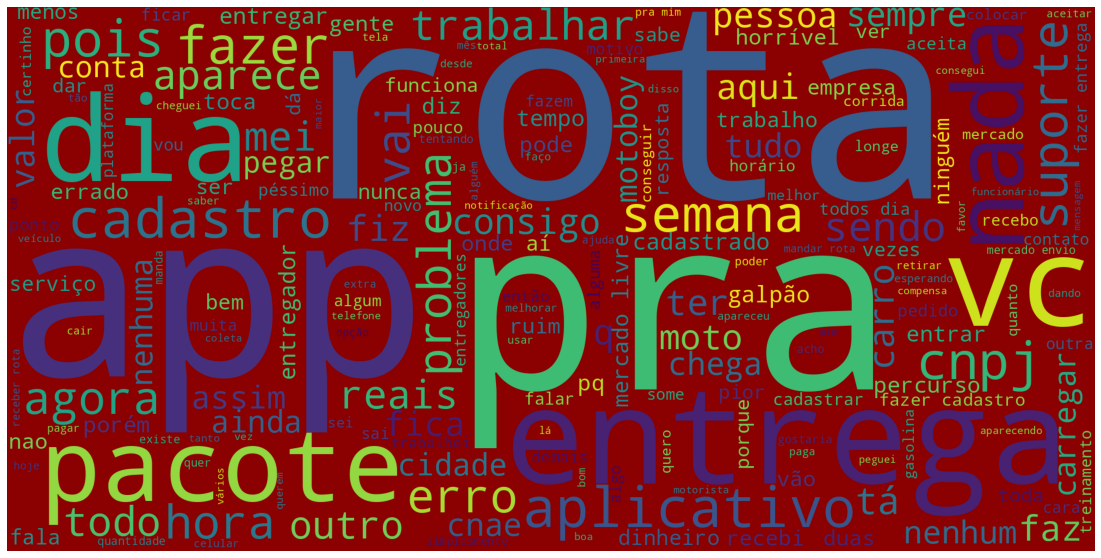

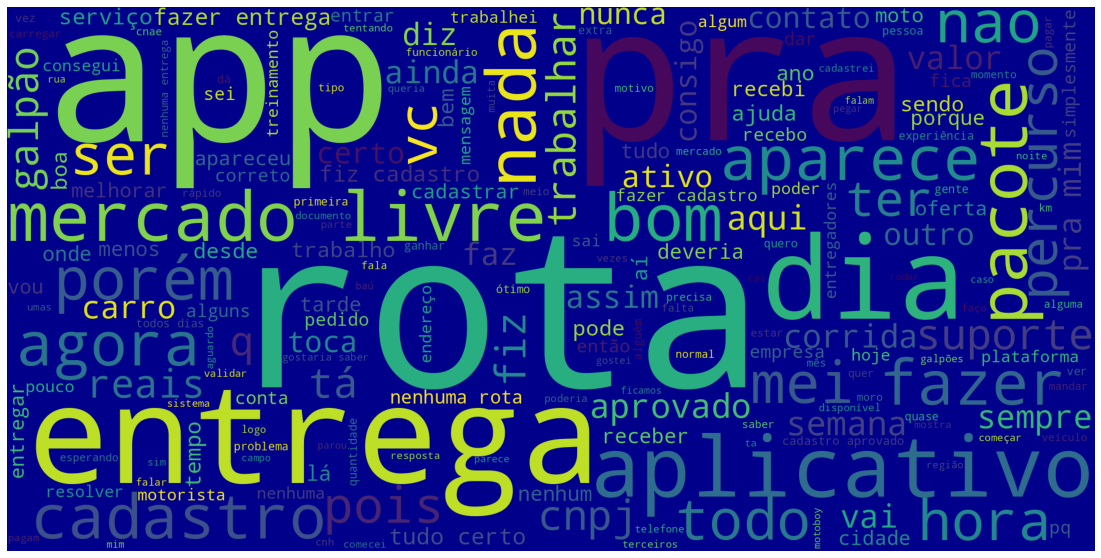

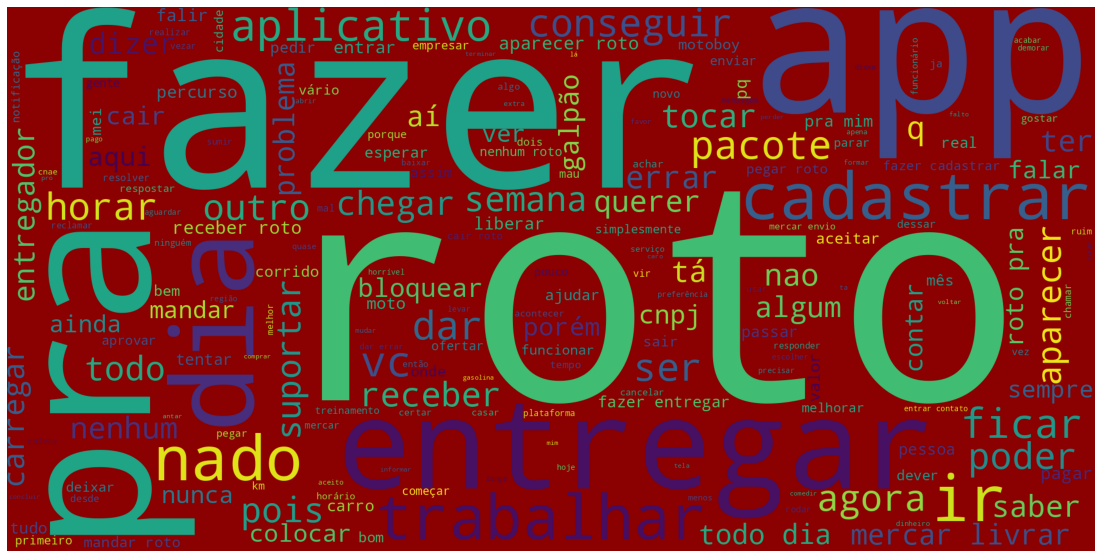

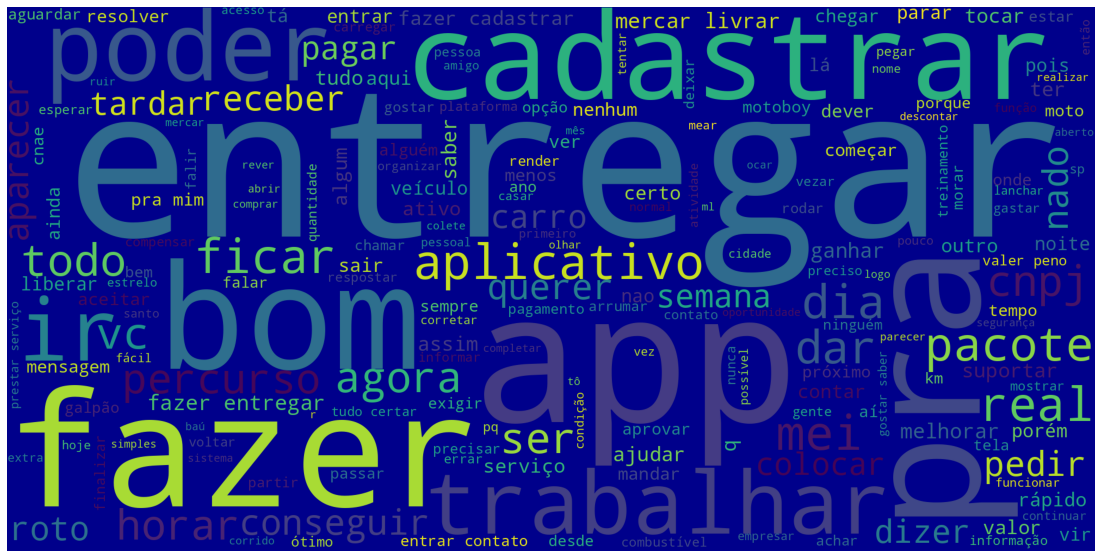

In [40]:
import matplotlib.pyplot as plt
for wordcloud in word_clouds:
    #configurando forma de apresentação do gráfico e apresentando no notebook.
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    plt.imshow(wordcloud)